# Lab Assignment 1 for CSE 7324 Fall 2017

___Members___: Hongning Yu, Hui Jiang, Hao Pan


## 1. Business Understanding

The dataset we choose is a IBM HR Analytics Employee Attrition & Performance dataset, which can be used to predict the attrition of employees. It is free to download and use from Kaggle: https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset.

This data set has 1470 records and 37 features, including 1 target feature. It has both numerical and categorical features, which meats the need for lab1.

Such a dataset can be used for conpanies to determine what elements affect employees' resignation, so that management team can make better decisions to attract potential employees and keep current employees loyal.


By visualizing all the attributes, we can obtain plenty of relationships among those features and figure out the information we need. And base on those relationships, we can pretty much make a prediction.

Our interest is to predict attriction probablity of an employee basing on all its features, so we can assume that if the predict accurcy(AUC) is above a certain level, say 80%, we can assume it is a good model. Of cause there are many more evaluation functions we can use but we think accurcy is our main concern.

## 2. Data Understanding

In [1]:
import pandas as pd
import seaborn 
import numpy as np
pd.set_option('display.max_columns', None)

df = pd.read_csv("./data.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


From the original dataset description, features below are ordinal and have such meanings:


Education:  1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'

EnvironmentSatisfaction: 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

JobInvolvement: 
1 'Low' 2 'Medium' 3 'High' 4 'Very High'

JobSatisfaction: 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

PerformanceRating: 
1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'

RelationshipSatisfaction: 
1 'Low' 2 'Medium' 3 'High' 4 'Very High'
### 2.1  Features and Data types

In [2]:
# show data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

There are 1470 entries and 34 features in total, since we treat attrition as our label. 

Only two dtypes exist: object and int64.  Except string features, all numerical ones are stored as int. In further data engineering, we probabily need to transfer them to float dtype. But for now let's keep it as it's and move on. 

Also there seems to be no null values in this dataset. To varify this, let's check:


In [3]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

It looks like the dataset don't have any NaN values. That's good. 

In [4]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Since we have 34 attributes in total, we just choose a subset of those attributes and add a descrption on it.

In [5]:
data_des = pd.DataFrame()
data_des['Features'] = df.columns[4:15]
data_des['Description'] = ['Department in which they work for', 'Distance from their home to company',
                           'Education level', 'Fields of education',
                           'Employee Count', 'Employee Number',
                           'Satisfaction level about their environment', 'Gender',
                           'Wage per hour', 'Involvement level of their jobs',
                           'Job level']
data_des['Discrete\Continuous'] = ['Discrete']*8 + ['Continuous'] + ['Discrete']*2
data_des['Scales'] = ['nominal']*2 + ['ordinal'] + ['nominal']*3 + ['ordinal'] + ['nominal']*2 + ['ordinal']*2
data_des['Range'] = ['Sales,Research & Development,Human Resources','1-29',
                     '1:Below College 2:College 3:Bachelor 4:Master 5:Doctor',
                     'Life Sciences, Other, Medical, Marketing, Technical Degree, Human Resources',
                     '1','1-2068','1:Low 2:Medium 3:High 4:Very High','Female,Male','30-100',
                     '1:Low 2:Medium 3:High 4:Very High','1-5']
data_des

,Features,Description,Discrete\Continuous,Scales,Range
0,Department,Department in which they work for,Discrete,nominal,"Sales,Research & Development,Human Resources"
1,DistanceFromHome,Distance from their home to company,Discrete,nominal,1-29
2,Education,Education level,Discrete,ordinal,1:Below College 2:College 3:Bachelor 4:Master ...
3,EducationField,Fields of education,Discrete,nominal,"Life Sciences, Other, Medical, Marketing, Tech..."
4,EmployeeCount,Employee Count,Discrete,nominal,1
5,EmployeeNumber,Employee Number,Discrete,nominal,1-2068
6,EnvironmentSatisfaction,Satisfaction level about their environment,Discrete,ordinal,1:Low 2:Medium 3:High 4:Very High
7,Gender,Gender,Discrete,nominal,"Female,Male"
8,HourlyRate,Wage per hour,Continuous,nominal,30-100
9,JobInvolvement,Involvement level of their jobs,Discrete,ordinal,1:Low 2:Medium 3:High 4:Very High


### 2.2 Data quality

First let's see the unique values of all Object features

In [6]:
obj_list = df.select_dtypes(include=['object']).columns.tolist()
for col in obj_list:
    print('{}: \n{}\n'.format(col, df[col].unique()))

Attrition: 
['Yes' 'No']

BusinessTravel: 
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']

Department: 
['Sales' 'Research & Development' 'Human Resources']

EducationField: 
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']

Gender: 
['Female' 'Male']

JobRole: 
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']

MaritalStatus: 
['Single' 'Married' 'Divorced']

Over18: 
['Y']

OverTime: 
['Yes' 'No']



BusinessTravel, Attrition and OverTime can be considered as ordinal. So encode them to numbers.


Also, df.Over18 has only one value 'Yes'. So drop this feature.

In [7]:
df.BusinessTravel.replace(to_replace=['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], 
                          value=[1, 2, 0], 
                          inplace=True)

df.Attrition.replace(to_replace=['Yes', 'No'], value=[1, 0], inplace=True)

df.OverTime.replace(to_replace=['Yes', 'No'], value=[1, 0], inplace=True)

if 'Over18' in df:
    df.drop('Over18', axis=1, inplace=True)

Let's also check numerical features:

In [8]:
df_temp = df.select_dtypes(exclude=['object'])
df_temp.max() - df_temp.min()

Age                            42
Attrition                       1
BusinessTravel                  2
DailyRate                    1397
DistanceFromHome               28
Education                       4
EmployeeCount                   0
EmployeeNumber               2067
EnvironmentSatisfaction         3
HourlyRate                     70
JobInvolvement                  3
JobLevel                        4
JobSatisfaction                 3
MonthlyIncome               18990
MonthlyRate                 24905
NumCompaniesWorked              9
OverTime                        1
PercentSalaryHike              14
PerformanceRating               1
RelationshipSatisfaction        3
StandardHours                   0
StockOptionLevel                3
TotalWorkingYears              40
TrainingTimesLastYear           6
WorkLifeBalance                 3
YearsAtCompany                 40
YearsInCurrentRole             18
YearsSinceLastPromotion        15
YearsWithCurrManager           17
dtype: int64

Looks like 'EmployeeCount' and 'StandardHours' each has only one value. If so, just drop these columns.
Also, EmployeeNumber is an Unique employee ID, which has no help for our clasification problem, so drop it.

In [9]:
print(df.EmployeeCount.unique())
print(df.StandardHours.unique())

[1]
[80]


In [10]:
if 'EmployeeCount' in df:
    df.drop('EmployeeCount', axis=1, inplace=True)
if 'StandardHours' in df:
    df.drop('StandardHours', axis=1, inplace=True)
if 'EmployeeNumber' in df:
    df.drop('EmployeeNumber', axis=1, inplace=True)

## 3. Data Visualization

### 3.1 Feature Exploring 

In [11]:
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.simplefilter('ignore', DeprecationWarning)

%matplotlib inline 

Let's plot the overall distribution of attributes, so we can grab a dierect idea of how features distribute.

Feature with object dtypes will be explored later.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10ccc3940>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1112d2390>]], dtype=object)

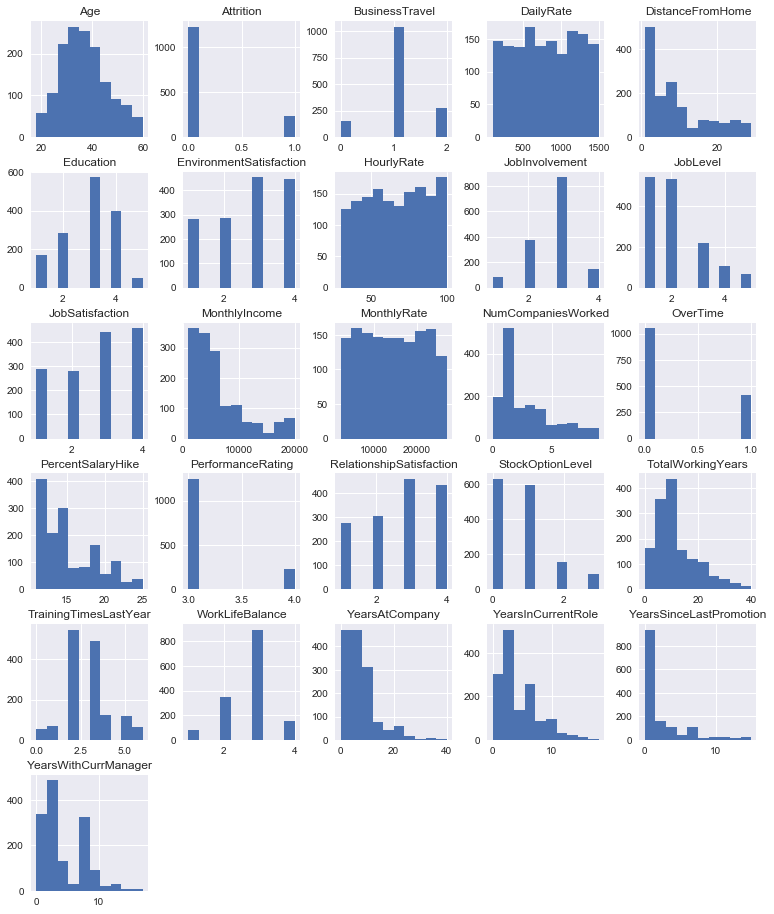

In [12]:
df.hist(figsize=(13,16))

#### 3.1.1 Department

In [13]:
# Total attrition rate
print("Total attrition rate: {}".format(df.Attrition.sum()/df.Attrition.count()*100))
print('---------------------------------------')

# group by Department and count attrition rate
print("Value counts of departments:")
print(df.Department.value_counts())
print('---------------------------------------')

print("Attrition rate of departments:")
df_group_department = df.groupby(by='Department')
print(df_group_department.Attrition.sum()/df_group_department.Attrition.count())

Total attrition rate: 16.122448979591837
---------------------------------------
Value counts of departments:
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
---------------------------------------
Attrition rate of departments:
Department
Human Resources           0.190476
Research & Development    0.138398
Sales                     0.206278
Name: Attrition, dtype: float64


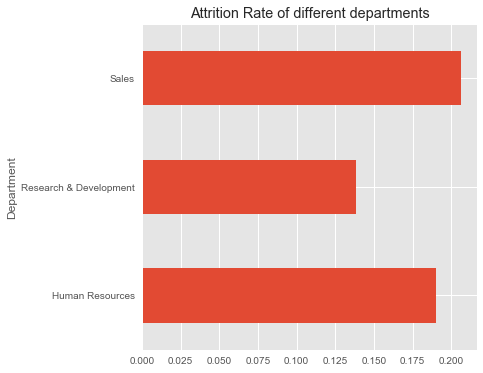

In [14]:
# plot attrition rate of different departments
plt.style.use('ggplot')
attrition_rate = df_group_department.Attrition.sum()/df_group_department.Attrition.count()

ax = attrition_rate.plot(kind='barh', figsize=(6,6))
plt.title("Attrition Rate of different departments")

Looks like Research&Development has the lowest attrition rate, around 0.13. Sales and HR departments have similar ratios, around 2.0. Let's further draw a stacked bar plot so we can better see ratio compared to department employee number.

Attrition               False  True 
Department                          
Human Resources            51     12
Research & Development    828    133
Sales                     354     92


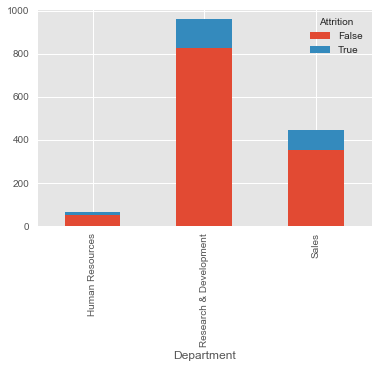

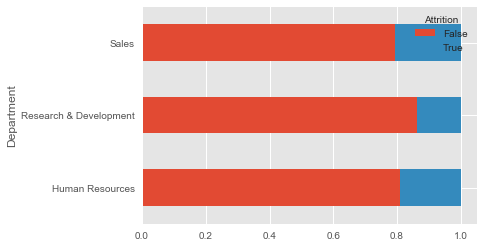

In [15]:
# showing total amount and percentage in one plot
ct_department = pd.crosstab([df['Department']],df.Attrition.astype(bool))
print(ct_department)
ct_department.plot(kind='bar', stacked=True)

ct_department_rate = ct_department.div(ct_department.sum(axis=1).astype(float), axis=0)
ct_department_rate.plot(kind='barh', stacked=True)

Looks like Research&Development people have the highest loyalty.
#### 3.1.2 Distance


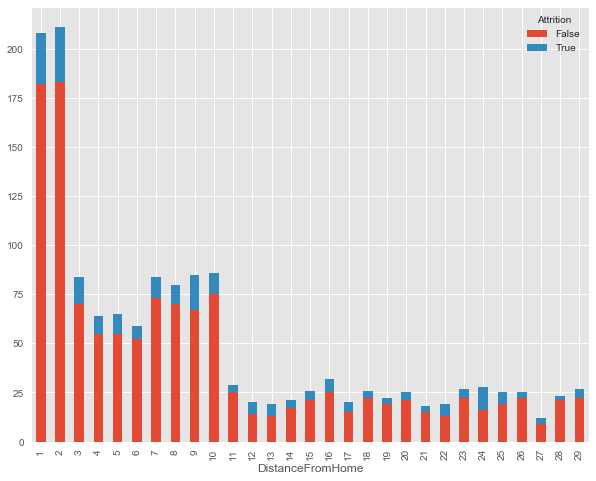

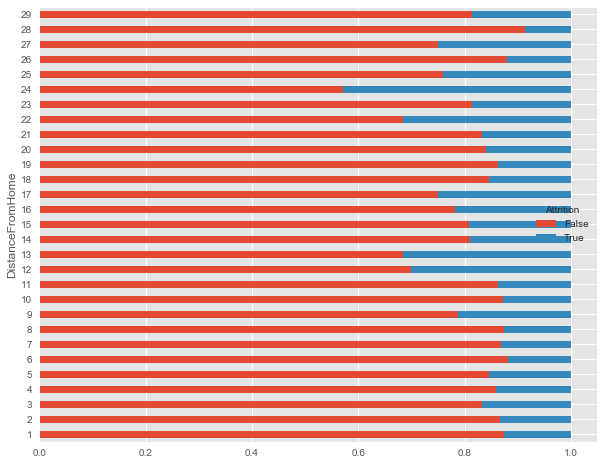

In [16]:
ct_distance = pd.crosstab([df['DistanceFromHome']],df.Attrition.astype(bool))
ct_distance.plot(kind='bar', 
                 stacked=True, 
                 figsize=(10,8))

ct_distance_rate = ct_distance.div(ct_distance.sum(axis=1).astype(float), axis=0)
ct_distance_rate.plot(kind='barh', 
                      stacked=True, 
                      figsize=(10,8))

Distance to work could be a factor affecting people's resignation decision. Though most people live within 10 miles from work place, there is no clear pattern we can see from the histogram. Looks like DistanceFromHome is not a very good indicator or reason whether poeple leave a company or not.

#### 3.1.3 Education 

Attrition     False     True 
Education                    
1          0.817647  0.182353
2          0.843972  0.156028
3          0.826923  0.173077
4          0.854271  0.145729
5          0.895833  0.104167


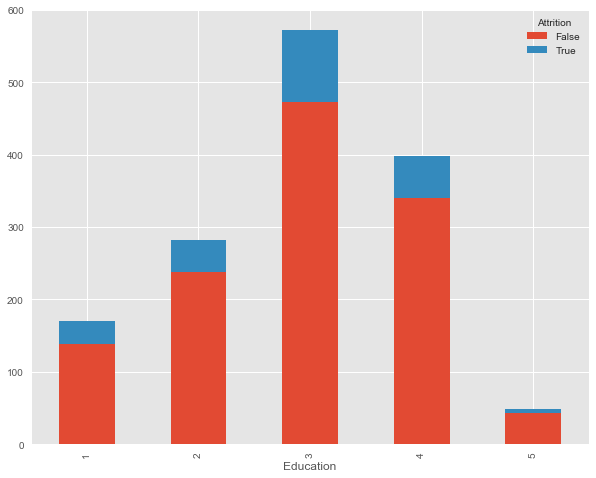

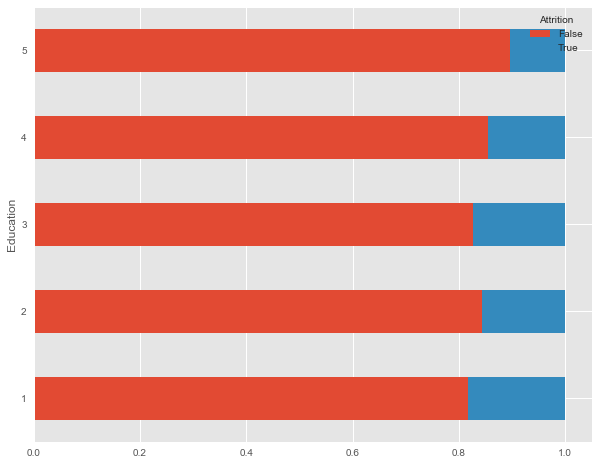

In [17]:
ct_education = pd.crosstab([df['Education']],df.Attrition.astype(bool))
ct_education.plot(kind='bar', 
                 stacked=True, 
                 figsize=(10,8))

ct_education_rate = ct_education.div(ct_education.sum(axis=1).astype(float), axis=0)
print(ct_education_rate)
ct_education_rate.plot(kind='barh', 
                      stacked=True, 
                      figsize=(10,8))

Looks like there is some negative correlation between education level and attrition rate. People with lower education have a slightly higher rate of attrition, from 0.10 at level 5, to 0.18 at level 1. This makes sense that people with higher education levels usually have higher position or salary. Relationship with income was further explored in 3.1.7. 
#### 3.1.5 Gender and EducationField


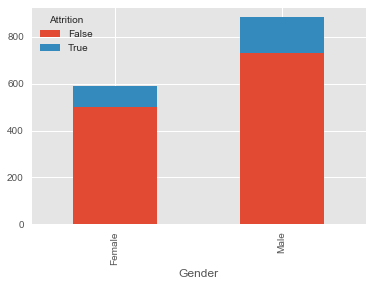

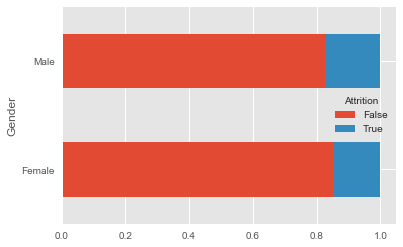

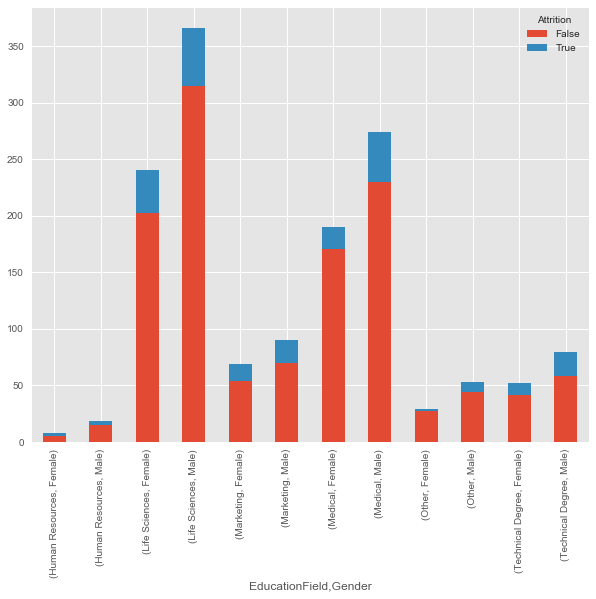

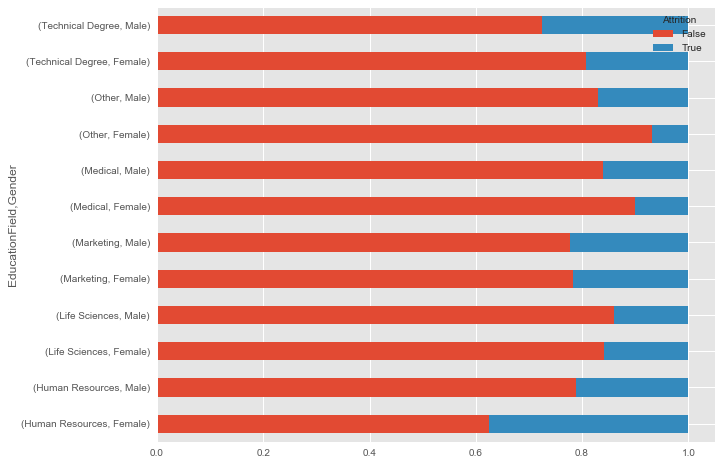

In [18]:
ct_gender = pd.crosstab([df['Gender']],df.Attrition.astype(bool))
ct_gender.plot(kind='bar', stacked=True)

ct_gender_rate = ct_gender.div(ct_gender.sum(axis=1).astype(float), axis=0)
ct_gender_rate.plot(kind='barh', stacked=True)

ct_educationfield = pd.crosstab([df['EducationField'], df['Gender']],df.Attrition.astype(bool))
ct_educationfield.plot(kind='bar', stacked=True, figsize=(10,8))

ct_educationfield_rate = ct_educationfield.div(ct_educationfield.sum(axis=1).astype(float), axis=0)
ct_educationfield_rate.plot(kind='barh', stacked=True, figsize=(10,8))

Overall, men and women have nearly the same attrition rate, though there are more men in this company.

Top two popular degrees in this company are Life Science and Medical. Looks like this company is in the field of drugs. We can see that females in Human Resources have the highest attrition rate, about 0.375, next are males in Technical, at around 0.27. Top two lowest rate belong to female(other) and female(medical), though we don't have further information about "other" field.
#### 3.1.6 Gender and Department

Attrition                      False  True 
Department             Gender              
Human Resources        Female     14      6
                       Male       37      6
Research & Development Female    336     43
                       Male      492     90
Sales                  Female    151     38
                       Male      203     54


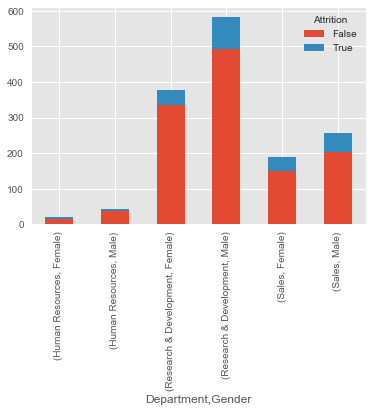

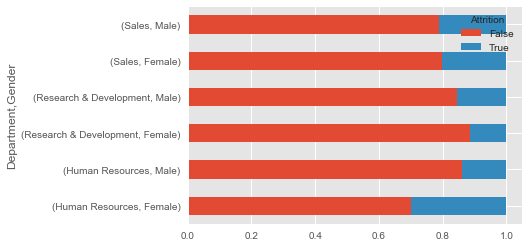

In [19]:
ct_gender = pd.crosstab([df['Department'], df['Gender']], df.Attrition.astype(bool))
print(ct_gender)
ct_gender.plot(kind='bar', 
               stacked=True)

ct_gender_rate = ct_gender.div(ct_gender.sum(axis=1).astype(float), axis=0)
ct_gender_rate.plot(kind='barh', 
                    stacked=True)

Just like Gender vs. Education, females in human resources department have the highest attrition rate, but this time males in sale come in next. 

Also, it looks like females in research/development have the highest loyalty.

Let's further check gender distribution across departments.

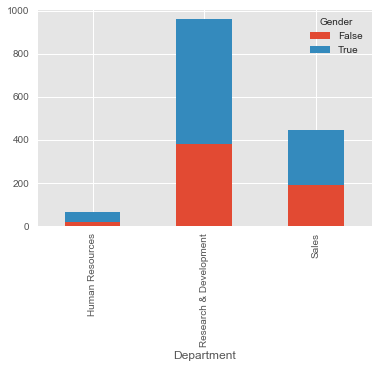

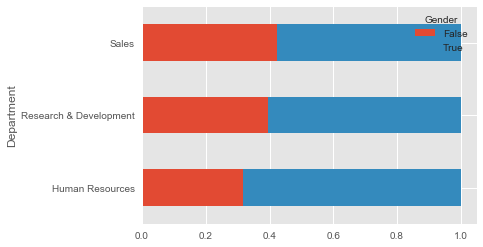

In [20]:
# map {male: 1, female: 0}
df_temp = df.replace(to_replace=['Male', 'Female'], value=[1, 0])

ct = pd.crosstab([df_temp['Department']], df_temp.Gender.astype(bool))
ct.plot(kind='bar', stacked=True)

ct_rate = ct.div(ct.sum(axis=1).astype(float), axis=0)
ct_rate.plot(kind='barh', stacked=True)

#### 3.1.6 YearsAtCompany vs. Department／Gender vs. Attrition

/Users/alexyu/anaconda/envs/python3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


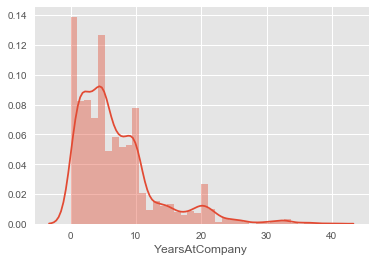

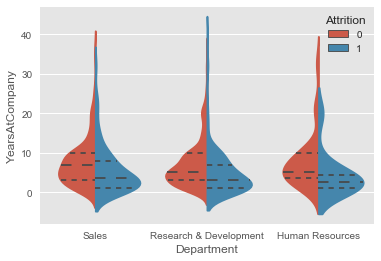

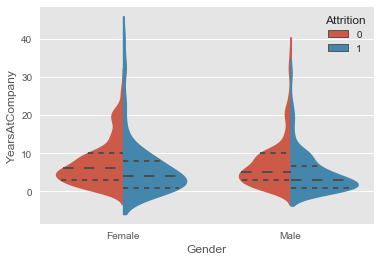

In [21]:
sns.distplot(df.YearsAtCompany)

f, ax = plt.subplots()

sns.violinplot(x="Department", y="YearsAtCompany", hue="Attrition", data=df, 
               split=True, inner="quart")

f, ax = plt.subplots()
sns.violinplot(x="Gender", y="YearsAtCompany", hue="Attrition", data=df, 
               split=True, inner="quart")

As we can see, employees in three department have similar YearsAtCompany distribution(a skewed Gaussian distribution). We can see the attention accross departments or genders that people tent to leave company in their early years, mostly under 10 years.

Also, YearsAtCompany distribution across Genders are similar, and show the same tendency to leave early.

#### 3.1.7 MonthlyIncome vs. Department/Gender vs. Attrition

/Users/alexyu/anaconda/envs/python3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


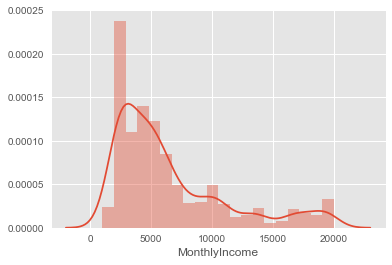

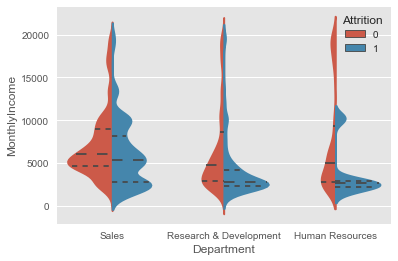

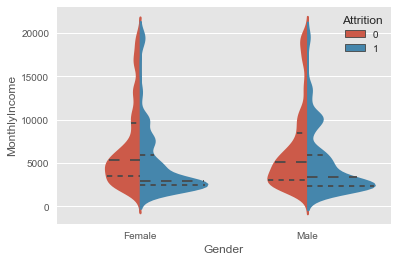

In [22]:
sns.distplot(df.MonthlyIncome)

f, ax = plt.subplots()

sns.violinplot(x="Department", y="MonthlyIncome", hue="Attrition", data=df, 
               split=True, inner="quartile", bw=.2)

f, ax = plt.subplots()
sns.violinplot(x="Gender", y="MonthlyIncome", hue="Attrition", data=df, 
               split=True, inner="quartile", bw=.2)

Both violin graph show people have higher tendency to leave when they have lower salary. 

In department graph, salesmen's salary have a wider spread and are higher than other two departments in average. 

In gender graph, it looks like men and women have similar income distribution. 
#### 3.1.8 Job Satisfaction

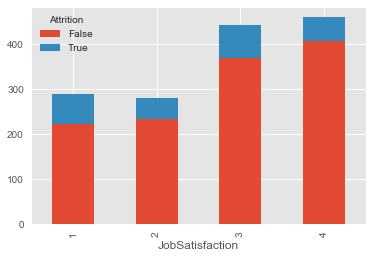

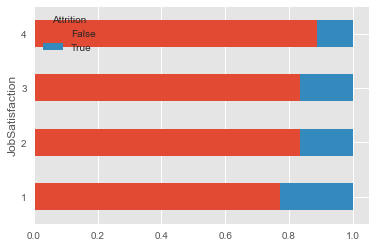

In [23]:
ct_sat = pd.crosstab([df['JobSatisfaction']],df.Attrition.astype(bool))
ct_sat.plot(kind='bar', stacked=True)

ct_sat_rate = ct_sat.div(ct_sat.sum(axis=1).astype(float), axis=0)
ct_sat_rate.plot(kind='barh', stacked=True)

We see that the higher satisfaction level is, the lower attrition rate is.

### 3.2 Relationship Exploring

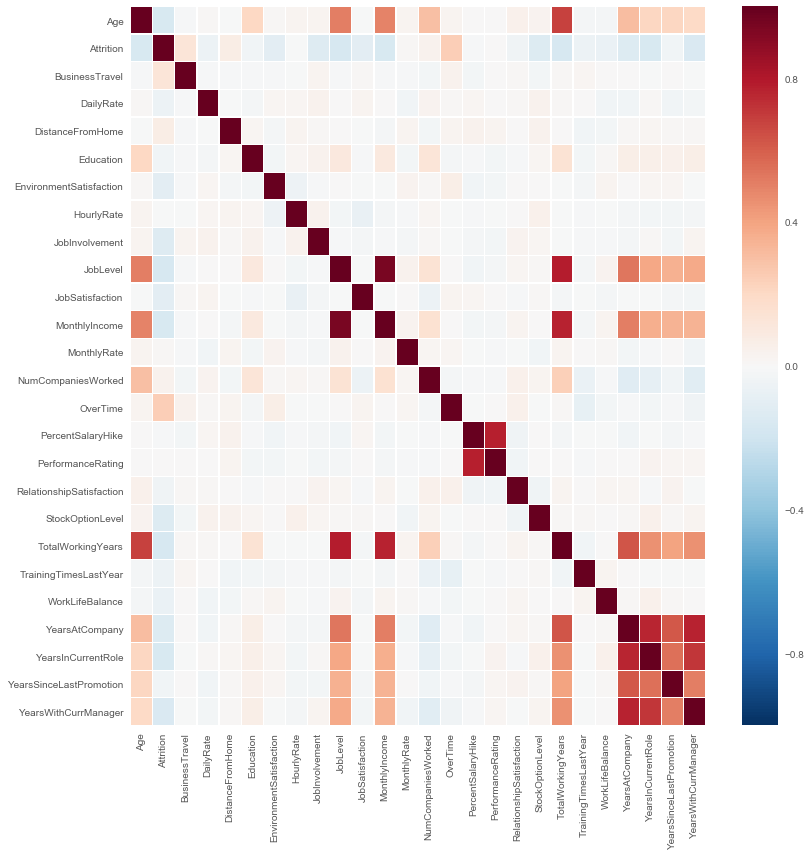

In [24]:
figure, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(df.corr(), vmin=-1, vmax=1, linewidths=.2)

figure.tight_layout()

The strongest correlation is MonthlyIncome and JobLevel, which is quite intuitive that higher position comes with higher income. Next one is PerformanceRating and PercentSalaryHike, which is quite interesting. Higher salary increase comes with higher performance.

TotalWorkingYears are related with age, JobLevel and Monthly income. 

YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, and YearsWithCurrentManager are corelated with each other, and all have some corelation with age, JobLevel, Imcome, and TotalWorkingYears, which makes sense since they are all time related features.

Attrition is the feature we interest in, but its corelation with other features are really weak. OverTime has highest positive corelation, which means people work overtime tend to leave a company. Most other features have negative corelations with Attrition. The lower the satisfaction/job level/years spend in company, the higher chance they resign.

Now we select some features and explore their relationships.

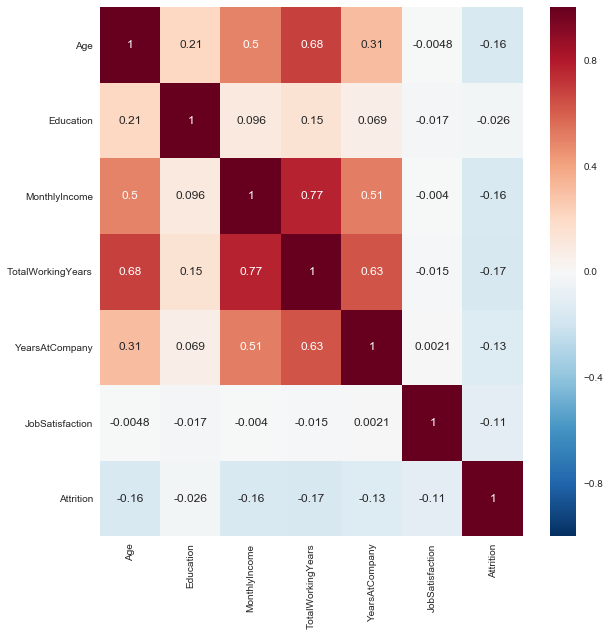

In [25]:
df_new = df.select_dtypes(exclude=['object']).copy()

df_new = df_new[['Age', 'Education', 'MonthlyIncome', 'TotalWorkingYears', 
                 'YearsAtCompany', 'JobSatisfaction', 'Attrition']]

df_new[['Age', 'Education', 'MonthlyIncome', 'TotalWorkingYears', 
        'YearsAtCompany', 'JobSatisfaction']] += np.random.rand(len(df_new),6)/2 

sns.set(style="darkgrid")

figure, ax = plt.subplots(figsize=(9, 9))
sns.heatmap(df_new.corr(), vmin=-1, vmax=1, annot=True)

figure.tight_layout()

This one clearly shows that people with lower age/income or less years in company have high attrition rate.

/Users/alexyu/anaconda/envs/python3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j
/Users/alexyu/anaconda/envs/python3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/Users/alexyu/anaconda/envs/python3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:32: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


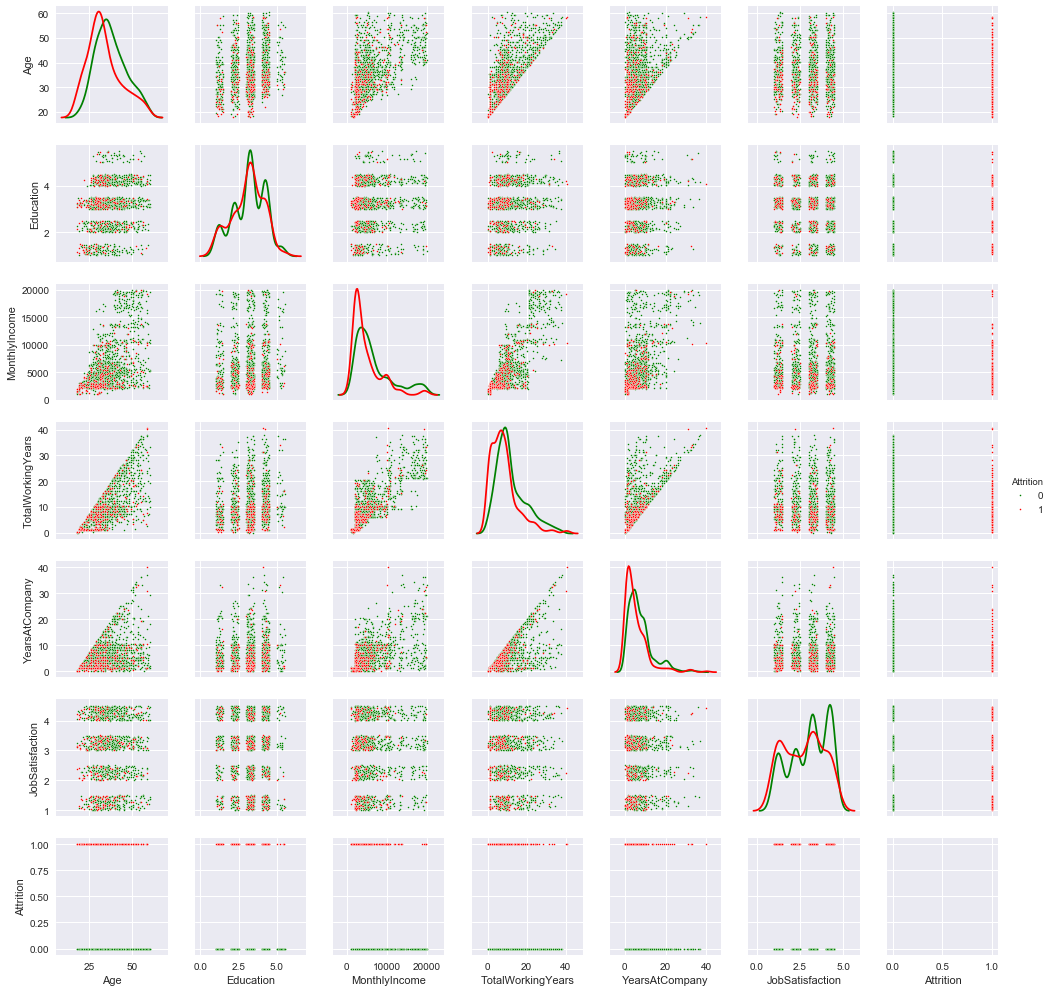

In [26]:
sns.pairplot(df_new, hue="Attrition", palette={1:'red', 0:'green'} , size=2, diag_kind="kde", plot_kws={"s": 3})
figure.tight_layout()

Non of these features are good indicators for our target. So let's try to reduce the dimentionality using principal component analysis.

## 4. Principle component analysis
Since PCA doesn't work well for categorial datas, let's exclude all categorical features first. 

In [27]:
from sklearn.preprocessing import StandardScaler
import numpy as np

df_pca = df.select_dtypes(exclude=['object']).copy()
y = df_pca['Attrition'].values

for col in ['Attrition', 'OverTime', 'PerformanceRating']:
    if col in df_pca:
        df_pca.drop(col, axis=1, inplace=True)
        

X = df_pca.values

print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (1470, 23)
Shape of y: (1470,)


There are 23 features in total. 

First we need to standardize the data so all features have mean value of 0. Then compute covariance matrix and eigen vectors with eigenvalues.

In [28]:
# standardize data
sc = StandardScaler()
X_std = sc.fit_transform(X)

# compute covariance matrix
cov_mat = np.cov(X_std.T)

eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('Eigenvalues:\n{}\n'.format(eigen_vals))
print('Number of Eigen Values: {}'.format(len(eigen_vals)))

Eigenvalues:
[ 4.65888057  1.80700858  0.04844033  0.14208845  0.20519103  0.28003747
  0.52216389  0.54113862  1.19606617  0.75379832  1.12089857  0.87629416
  1.07378953  1.05800593  1.0517375   0.8936199   0.90065289  1.02381401
  0.93934865  1.00185318  0.9931861   0.9585764   0.96906665]

Number of Eigen Values: 23


/Users/alexyu/anaconda/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


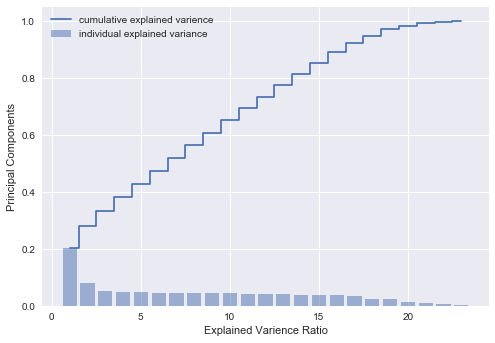

In [29]:
# ploting code from Sebastian, Python Machine Learning book, Chapter 5 P132.
tot = sum(eigen_vals)
var_exp = [(i/tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(1,24), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,24), cum_var_exp, where='mid', label='cumulative explained varience')
plt.xlabel('Explained Varience Ratio')
plt.ylabel('Principal Components')
plt.legend(loc='best')

As show above, we need 18 PCs to get 90% varience, which means we can reduce dimention from 23 to 18 with the cost of 10% varience. Top 10 PCs account for 60% of total varience. Top 2 PCs only accounts for 25% of total varience, but let's first try to transform our 23-dimention data to only 2 dimentions, so that we can visualize it in 2 dimention.

In [30]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(reverse=True)

w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
              eigen_pairs[1][1][:, np.newaxis]))
print('Matrix w:\n', w)

X_pca = X_std.dot(w)
print("Shape of X_original: {}\nShape of X_transformed:{}".format(X_std.shape, X_pca.shape))

Matrix w:
 [[ 0.2770278   0.3788129 ]
 [-0.00278315 -0.03435337]
 [-0.00436554  0.06342391]
 [ 0.00415906 -0.02753498]
 [ 0.07793376  0.17838467]
 [ 0.00274814 -0.00291505]
 [-0.01021522  0.05494875]
 [-0.00109395  0.03201552]
 [ 0.38283043  0.23659711]
 [-0.00910353 -0.03015831]
 [ 0.37474692  0.25117775]
 [ 0.00556151  0.07148411]
 [ 0.04851957  0.48668796]
 [-0.01583232 -0.00947545]
 [ 0.01550859  0.06636029]
 [ 0.01600444  0.00486486]
 [ 0.40345837  0.22689296]
 [-0.01149779 -0.07370498]
 [ 0.0126772  -0.02435348]
 [ 0.39150606 -0.28251532]
 [ 0.33594016 -0.34409739]
 [ 0.29741085 -0.25985397]
 [ 0.3303899  -0.35347944]]
Shape of X_original: (1470, 23)
Shape of X_transformed:(1470, 2)


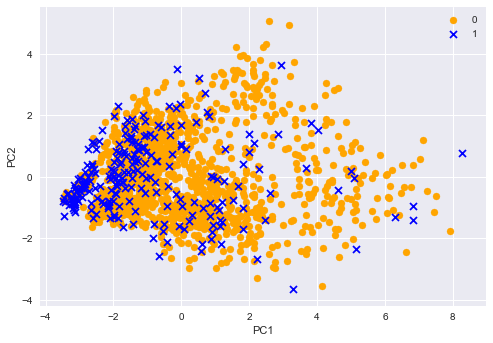

In [31]:
colors = [ 'orange','blue']
markers = ['o', 'x']

for l, c, m in zip(np.unique(y), colors, markers):
    plt.scatter(X_pca[y==l, 0],
                X_pca[y==l, 1],
                c=c, label=l, marker=m)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='upper right')

Since top two PCs only count for 25% of all variance, the clustering in this figure is not clear enough to get a separation. In further classification, we can use more than 2 PCs to achieve dimentionality reduction(which is hard to visualize). Decision Trees or boosting trees can be useful and also intuitive for this classification problem.

# Reference: 
Raschka, S. (2015). Python machine learning. Packt Publishing Ltd.


https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset


https://github.com/eclarson/MachineLearningNotebooks/blob/master/03.%20DataVisualization.ipynb